# Linear Regression

### Complexity: O(n.m.m)

n = samples

m = features

In [1]:
import pandas as pd

seed = 's1'

# Double Pole
base = '../../../../datalake/data_baseline/data/xdpole/initialconditions'
n_features = 6

ic = pd.read_csv(f"{base}/{seed}_run.csv")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features = ic.columns[[i for i in range(n_features)]]
target = 'performance'
X, y = ic[features], ic[target]

start = 1000 * 10
X, y = X[start:], y[start:]
X = PolynomialFeatures(2).fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
from critic import evolution
from sklearn import linear_model

def model(X=[], y=[]):
    m = linear_model.LinearRegression()
    if len(X) + len(y) > 0:
        m.fit(X,y)
    return m

s, p, t = evolution(X, y, model, batch=100)
print(t)

42.766943912


<Axes: >

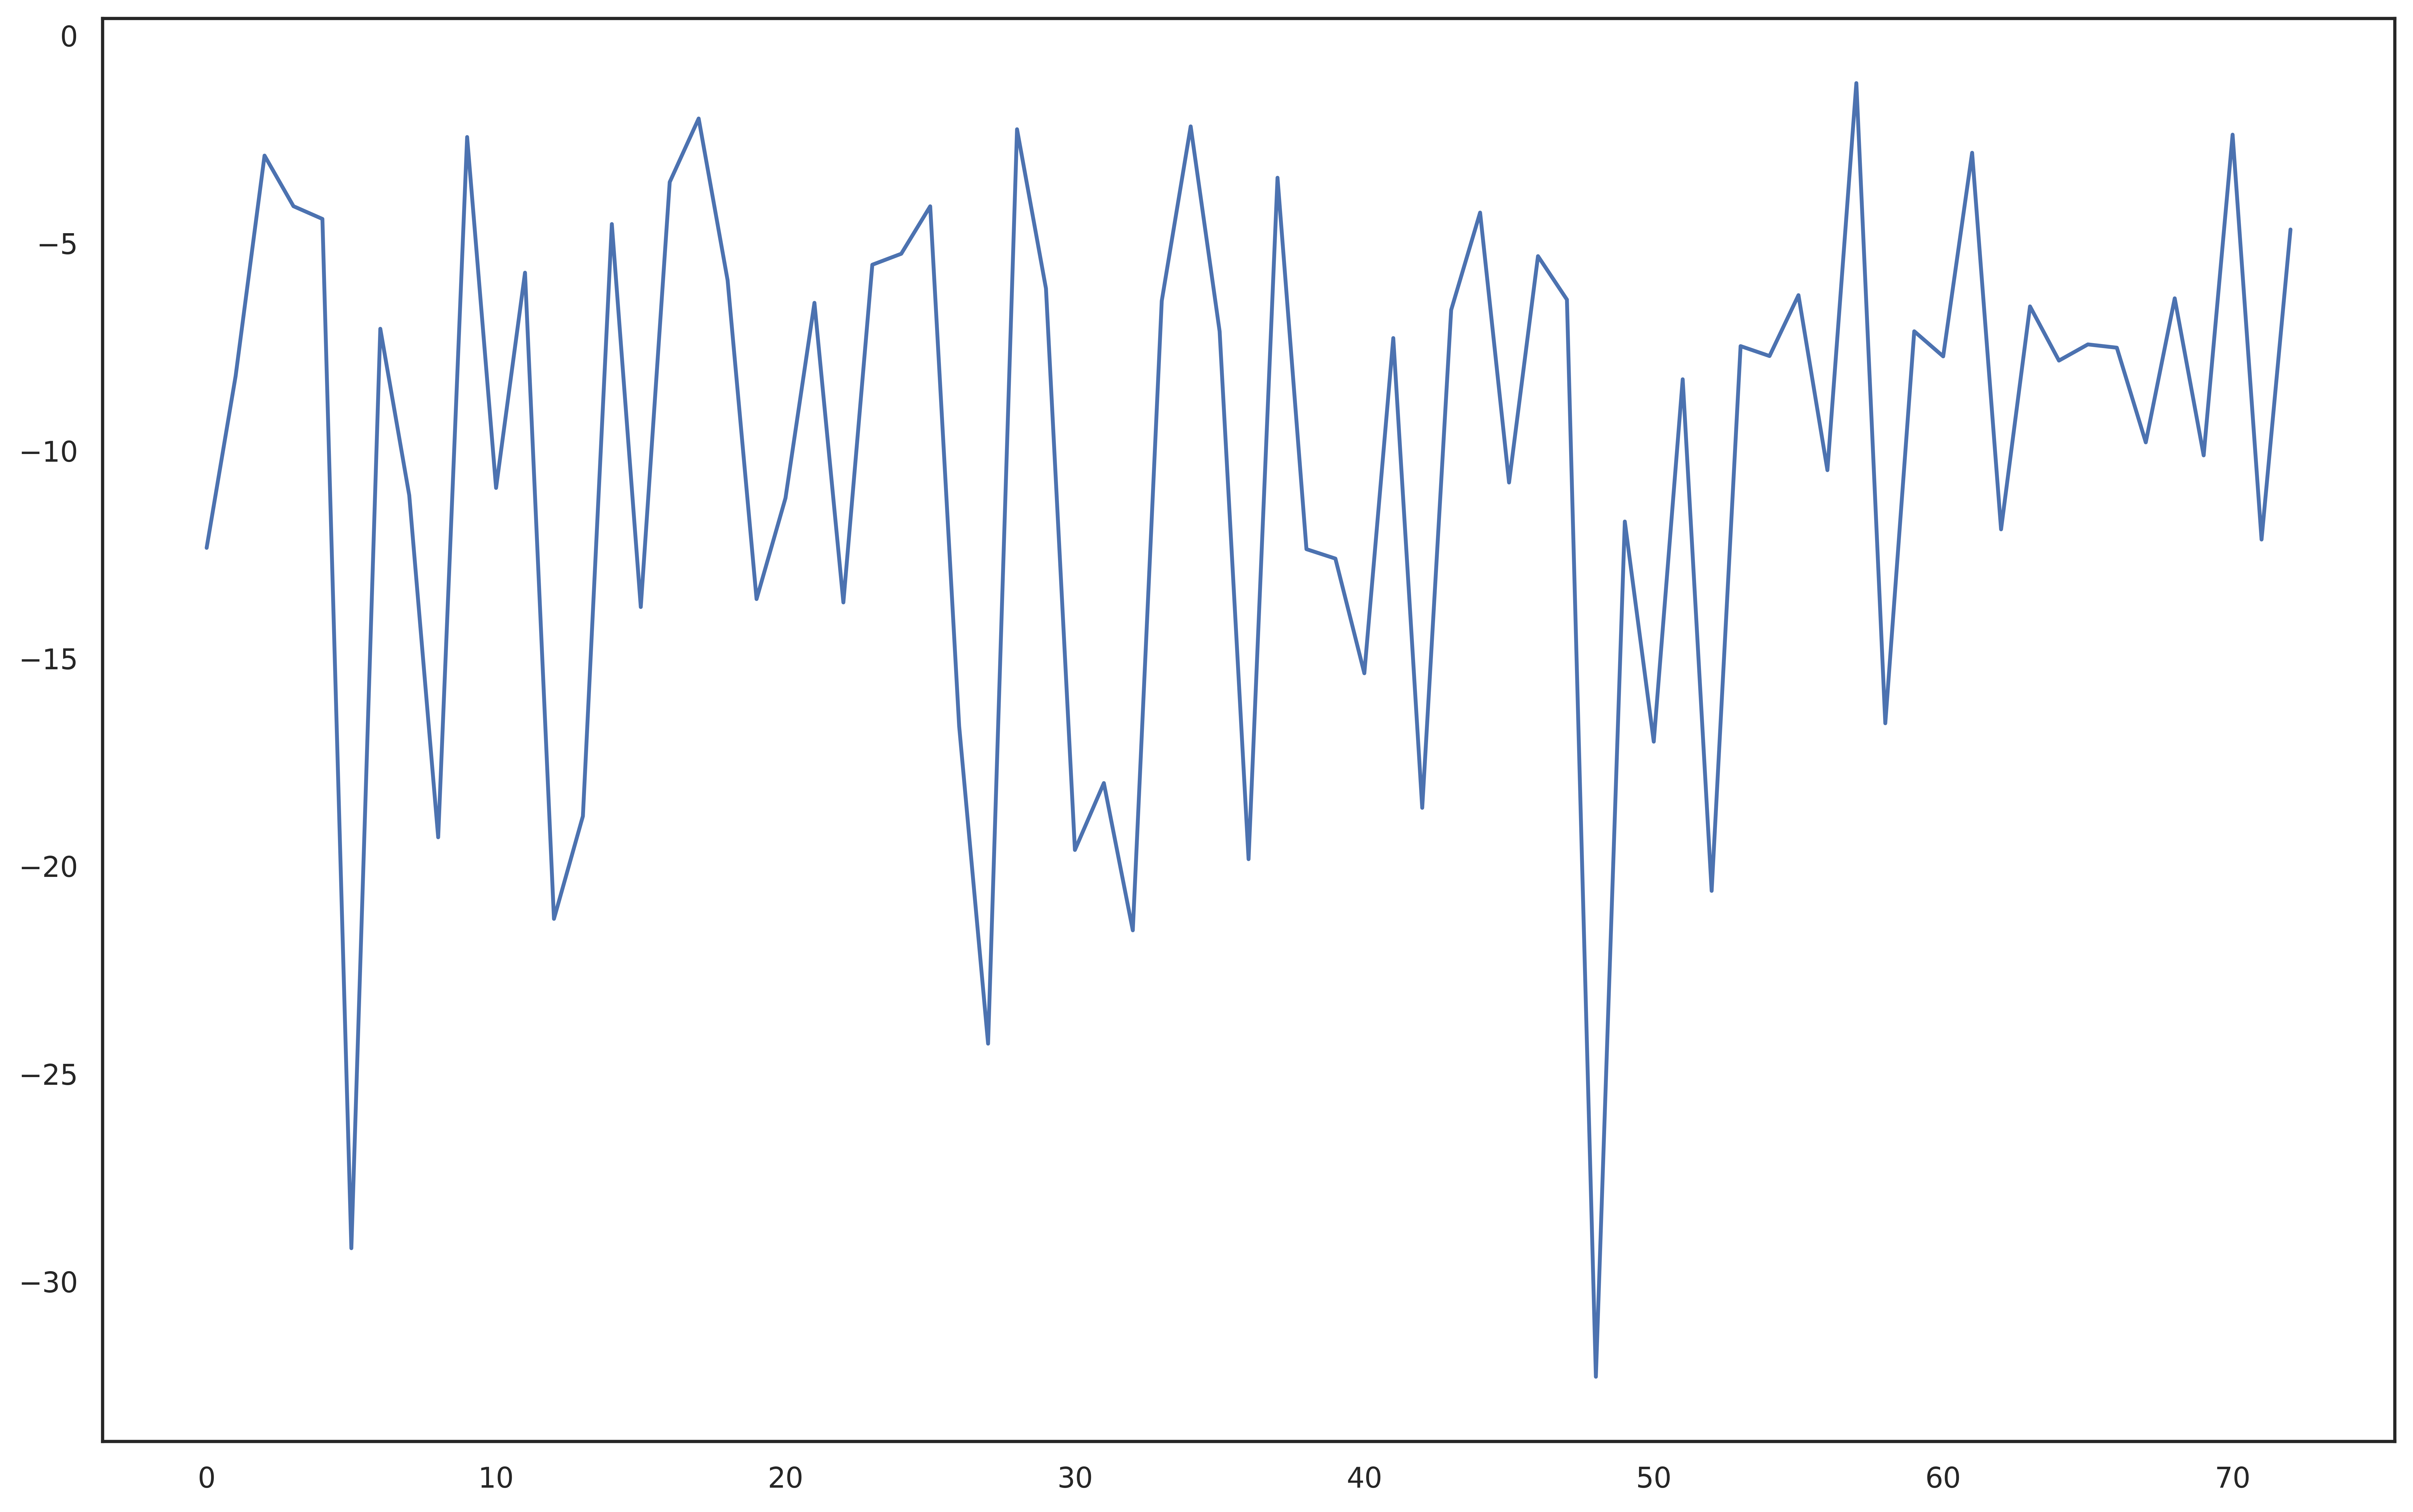

In [4]:
import seaborn as sns
from utils import graph_defaults
graph_defaults()

sns.lineplot(s)

In [9]:
_p = [yp for gen in p for yp in gen]

sns.scatterplot(_p)

<Axes: >

Error in callback <function flush_figures at 0x7532fc9df1c0> (for post_execute):


KeyboardInterrupt: 